In [1]:
import explain
from diabnet.model import load
from diabnet.data import get_feature_names
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
predictor = load('../diabnet/models/model-sp-soft-label-positives-1000-decay2.pth')
feat_names = get_feature_names("../datasets/visits_sp_unique_test_positivo_1000_random_0.csv", BMI=False, sex=True, parents_diagnostics=True)

In [3]:
e_train = explain.ExplainModel(predictor, feat_names, "../datasets/visits_sp_unique_train_positivo_1000_random_0.csv")

In [4]:
e_test = explain.ExplainModel(predictor, feat_names, "../datasets/visits_sp_unique_test_positivo_1000_random_0.csv")

In [5]:
attr, mask = e_train.calc_attr(20, 'X', samples=1)
df_20_X = e_train.attr_snps_mean(attr, mask).rename(columns={0: "age=20,sex=X"})
attr, mask = e_train.calc_attr(20, 'M', samples=1)
df_20_M = e_train.attr_snps_mean(attr, mask).rename(columns={0: "age=20,sex=M"})
attr, mask = e_train.calc_attr(20, 'F', samples=1)
df_20_F = e_train.attr_snps_mean(attr, mask).rename(columns={0: "age=20,sex=F"})

In [12]:
attr[0].shape

torch.Size([2, 1008])

In [51]:
df_decay2 = df_20_X.sort_values(by="age=20,sex=X", ascending=False)
df_decay2.head(20)

,"age=20,sex=X"
snp_3_5574766,0.261624
snp_18_21655669,0.225395
snp_17_72720155,0.174458
snp_20_32074430,0.157243
snp_19_19365233,0.156138
snp_5_75231448,0.151802
snp_5_109351989,0.137158
snp_4_138909352,0.132999
snp_15_20356143,0.129860
snp_10_15653813,0.120937


In [46]:
df_decay1 = df_20_X.sort_values(by="age=20,sex=X", ascending=False)
df_decay1.head(20)

,"age=20,sex=X"
snp_8_133434812,0.374533
snp_4_172986805,0.239484
snp_6_121073528,0.221105
snp_16_2394832,0.170117
snp_1_24057357,0.153471
snp_10_132976716,0.146838
snp_20_32074430,0.140496
snp_9_27901523,0.112258
snp_10_108808535,0.109719
snp_1_209147965,0.098360


In [54]:
df_train[df_train.index=='snp_4_172986805']

,"age=20,sex=X","age=20,sex=F","age=20,sex=M","age=50,sex=X","age=50,sex=F","age=50,sex=M"
snp_4_172986805,0.000097,0.000094,0.000105,0.000107,0.000098,0.000117


In [7]:
attr, mask = e_train.calc_attr(50, 'X', samples=1)
df_50_X = e_train.attr_snps_mean(attr, mask).rename(columns={0: "age=50,sex=X"})
attr, mask = e_train.calc_attr(50, 'M', samples=1)
df_50_M = e_train.attr_snps_mean(attr, mask).rename(columns={0: "age=50,sex=M"})
attr, mask = e_train.calc_attr(50, 'F', samples=1)
df_50_F = e_train.attr_snps_mean(attr, mask).rename(columns={0: "age=50,sex=F"})

In [8]:
df_train = df_20_X.join([df_20_F,df_20_M,df_50_X,df_50_F,df_50_M])

In [9]:
df_train.sort_values(by="age=20,sex=X", ascending=False).head(50)

,"age=20,sex=X","age=20,sex=F","age=20,sex=M","age=50,sex=X","age=50,sex=F","age=50,sex=M"
snp_1_152395302,0.379624,0.386047,0.359456,0.333663,0.328435,0.381148
snp_6_44264681,0.297152,0.300797,0.290500,0.375545,0.382842,0.370188
snp_4_95889514,0.257032,0.260457,0.239135,0.219156,0.222577,0.237174
snp_4_97934669,0.186355,0.200369,0.182435,0.172410,0.184601,0.163503
snp_15_44861299,0.177152,0.185710,0.156598,0.158326,0.167107,0.147389
snp_20_32074430,0.166233,0.172092,0.157800,0.183713,0.182457,0.184097
snp_3_123912059,0.157287,0.163878,0.155512,0.168814,0.172600,0.163916
snp_8_96479250,0.150115,0.147176,0.152138,0.143354,0.136564,0.155512
snp_10_51948737,0.142604,0.150693,0.124970,0.159295,0.167643,0.142297
snp_18_77365992,0.123676,0.120919,0.126227,0.130984,0.131041,0.129212


In [10]:
df_train.sort_values(by="age=50,sex=X", ascending=False).tail(50)

,"age=20,sex=X","age=20,sex=F","age=20,sex=M","age=50,sex=X","age=50,sex=F","age=50,sex=M"
snp_10_118897621,-0.009648,-0.009364,-0.010049,-0.012553,-0.012065,-0.013167
snp_7_57921203,-0.010058,-0.010056,-0.009899,-0.012590,-0.012796,-0.012394
snp_11_2830565,-0.010799,-0.010883,-0.010612,-0.013601,-0.013688,-0.013452
snp_2_95525540,-0.010931,-0.010920,-0.010843,-0.013635,-0.013806,-0.013525
snp_5_16460,-0.010770,-0.010612,-0.010851,-0.013638,-0.013441,-0.013805
snp_17_21554342,-0.010940,-0.010895,-0.010874,-0.013710,-0.013815,-0.013689
snp_1_202143512,-0.008505,-0.008451,-0.008352,-0.014912,-0.014815,-0.014726
snp_12_68585235.1,-0.012148,-0.012085,-0.012089,-0.015361,-0.015360,-0.015322
snp_16_82889990,-0.012798,-0.012639,-0.013117,-0.016349,-0.016232,-0.016390
snp_3_114638331,-0.013204,-0.013147,-0.013295,-0.017061,-0.016970,-0.017143


{'whiskers': [<matplotlib.lines.Line2D at 0x7f8e38eb0518>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8e38eb02b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8e38eb07f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8e38ea35f8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8e38ea3940>],
 'means': []}

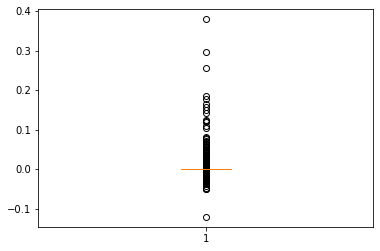

In [11]:
plt.boxplot(df_20_X.values)

In [13]:
attr, mask = e_test.calc_attr(20, 'X', samples=1)
df_20_X_test = e_test.attr_snps_mean(attr, mask).rename(columns={0: "age=20,sex=X"})
attr, mask = e_test.calc_attr(20, 'M', samples=1)
df_20_M_test = e_test.attr_snps_mean(attr, mask).rename(columns={0: "age=20,sex=M"})
attr, mask = e_test.calc_attr(20, 'F', samples=1)
df_20_F_test = e_test.attr_snps_mean(attr, mask).rename(columns={0: "age=20,sex=F"})

In [15]:
attr.shape

torch.Size([356, 2, 1008])

In [13]:
attr, mask = e_test.calc_attr(50, 'X', samples=1)
df_50_X_test = e_test.attr_snps_mean(attr, mask).rename(columns={0: "age=50,sex=X"})
attr, mask = e_test.calc_attr(50, 'M', samples=1)
df_50_M_test = e_test.attr_snps_mean(attr, mask).rename(columns={0: "age=50,sex=M"})
attr, mask = e_test.calc_attr(50, 'F', samples=1)
df_50_F_test = e_test.attr_snps_mean(attr, mask).rename(columns={0: "age=50,sex=F"})

In [14]:
df_test = df_20_X_test.join([df_20_F_test,df_20_M_test,df_50_X_test,df_50_F_test,df_50_M_test])

In [15]:
df_test.sort_values(by="age=20,sex=X", ascending=False).head(50)

,"age=20,sex=X","age=20,sex=F","age=20,sex=M","age=50,sex=X","age=50,sex=F","age=50,sex=M"
snp_6_44264681,0.286979,0.281794,0.294326,0.365529,0.362722,0.372507
snp_4_95889514,0.255662,0.198776,0.303733,0.226216,0.140985,0.315248
snp_15_44861299,0.182684,0.178769,0.214626,0.152804,0.147018,0.193361
snp_4_97934669,0.169675,0.175433,0.165911,0.138928,0.174047,0.123740
snp_20_32074430,0.153134,0.140082,0.199006,0.176774,0.172884,0.201004
snp_8_96479250,0.152479,0.150086,NaN,0.110258,0.115436,NaN
snp_18_77365992,0.134825,0.131689,0.154279,0.132467,0.134649,0.131458
snp_3_123912059,0.133094,NaN,0.131989,0.155449,NaN,0.158263
snp_1_24057357,0.127485,0.129009,0.127805,0.122134,0.114644,0.140552
snp_10_51948737,0.118839,0.118489,0.120112,0.137613,0.139629,0.136753


In [16]:
df_test.sort_values(by="age=20,sex=X", ascending=False).tail(50)

,"age=20,sex=X","age=20,sex=F","age=20,sex=M","age=50,sex=X","age=50,sex=F","age=50,sex=M"
snp_1_202143512,-0.009070,-0.008875,-0.009092,-0.015199,-0.015234,-0.015092
snp_3_110677390,-0.009073,-0.008858,-0.009284,-0.009177,-0.008984,-0.009319
snp_12_68585235.1,-0.009256,-0.009487,-0.008766,-0.012189,-0.012515,-0.011463
snp_7_57921203,-0.009465,-0.009240,-0.009836,-0.012108,-0.011977,-0.012297
snp_11_2830565,-0.010105,-0.009921,-0.010326,-0.012865,-0.012888,-0.012841
snp_5_16460,-0.010225,-0.009971,-0.010553,-0.013113,-0.012888,-0.013568
snp_2_95525540,-0.010624,-0.010515,-0.010821,-0.013343,-0.013251,-0.013476
snp_17_21554342,-0.010634,-0.010525,-0.010786,-0.013389,-0.013314,-0.013457
snp_14_63862582,-0.010882,-0.010586,-0.011403,-0.016335,-0.016127,-0.016447
snp_16_82889990,-0.012190,-0.011609,-0.013338,-0.015513,-0.014890,-0.016478


In [17]:
df = df_train.join(df_test, lsuffix='_train', rsuffix='_test')

/home/jgcarvalho/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/jgcarvalho/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


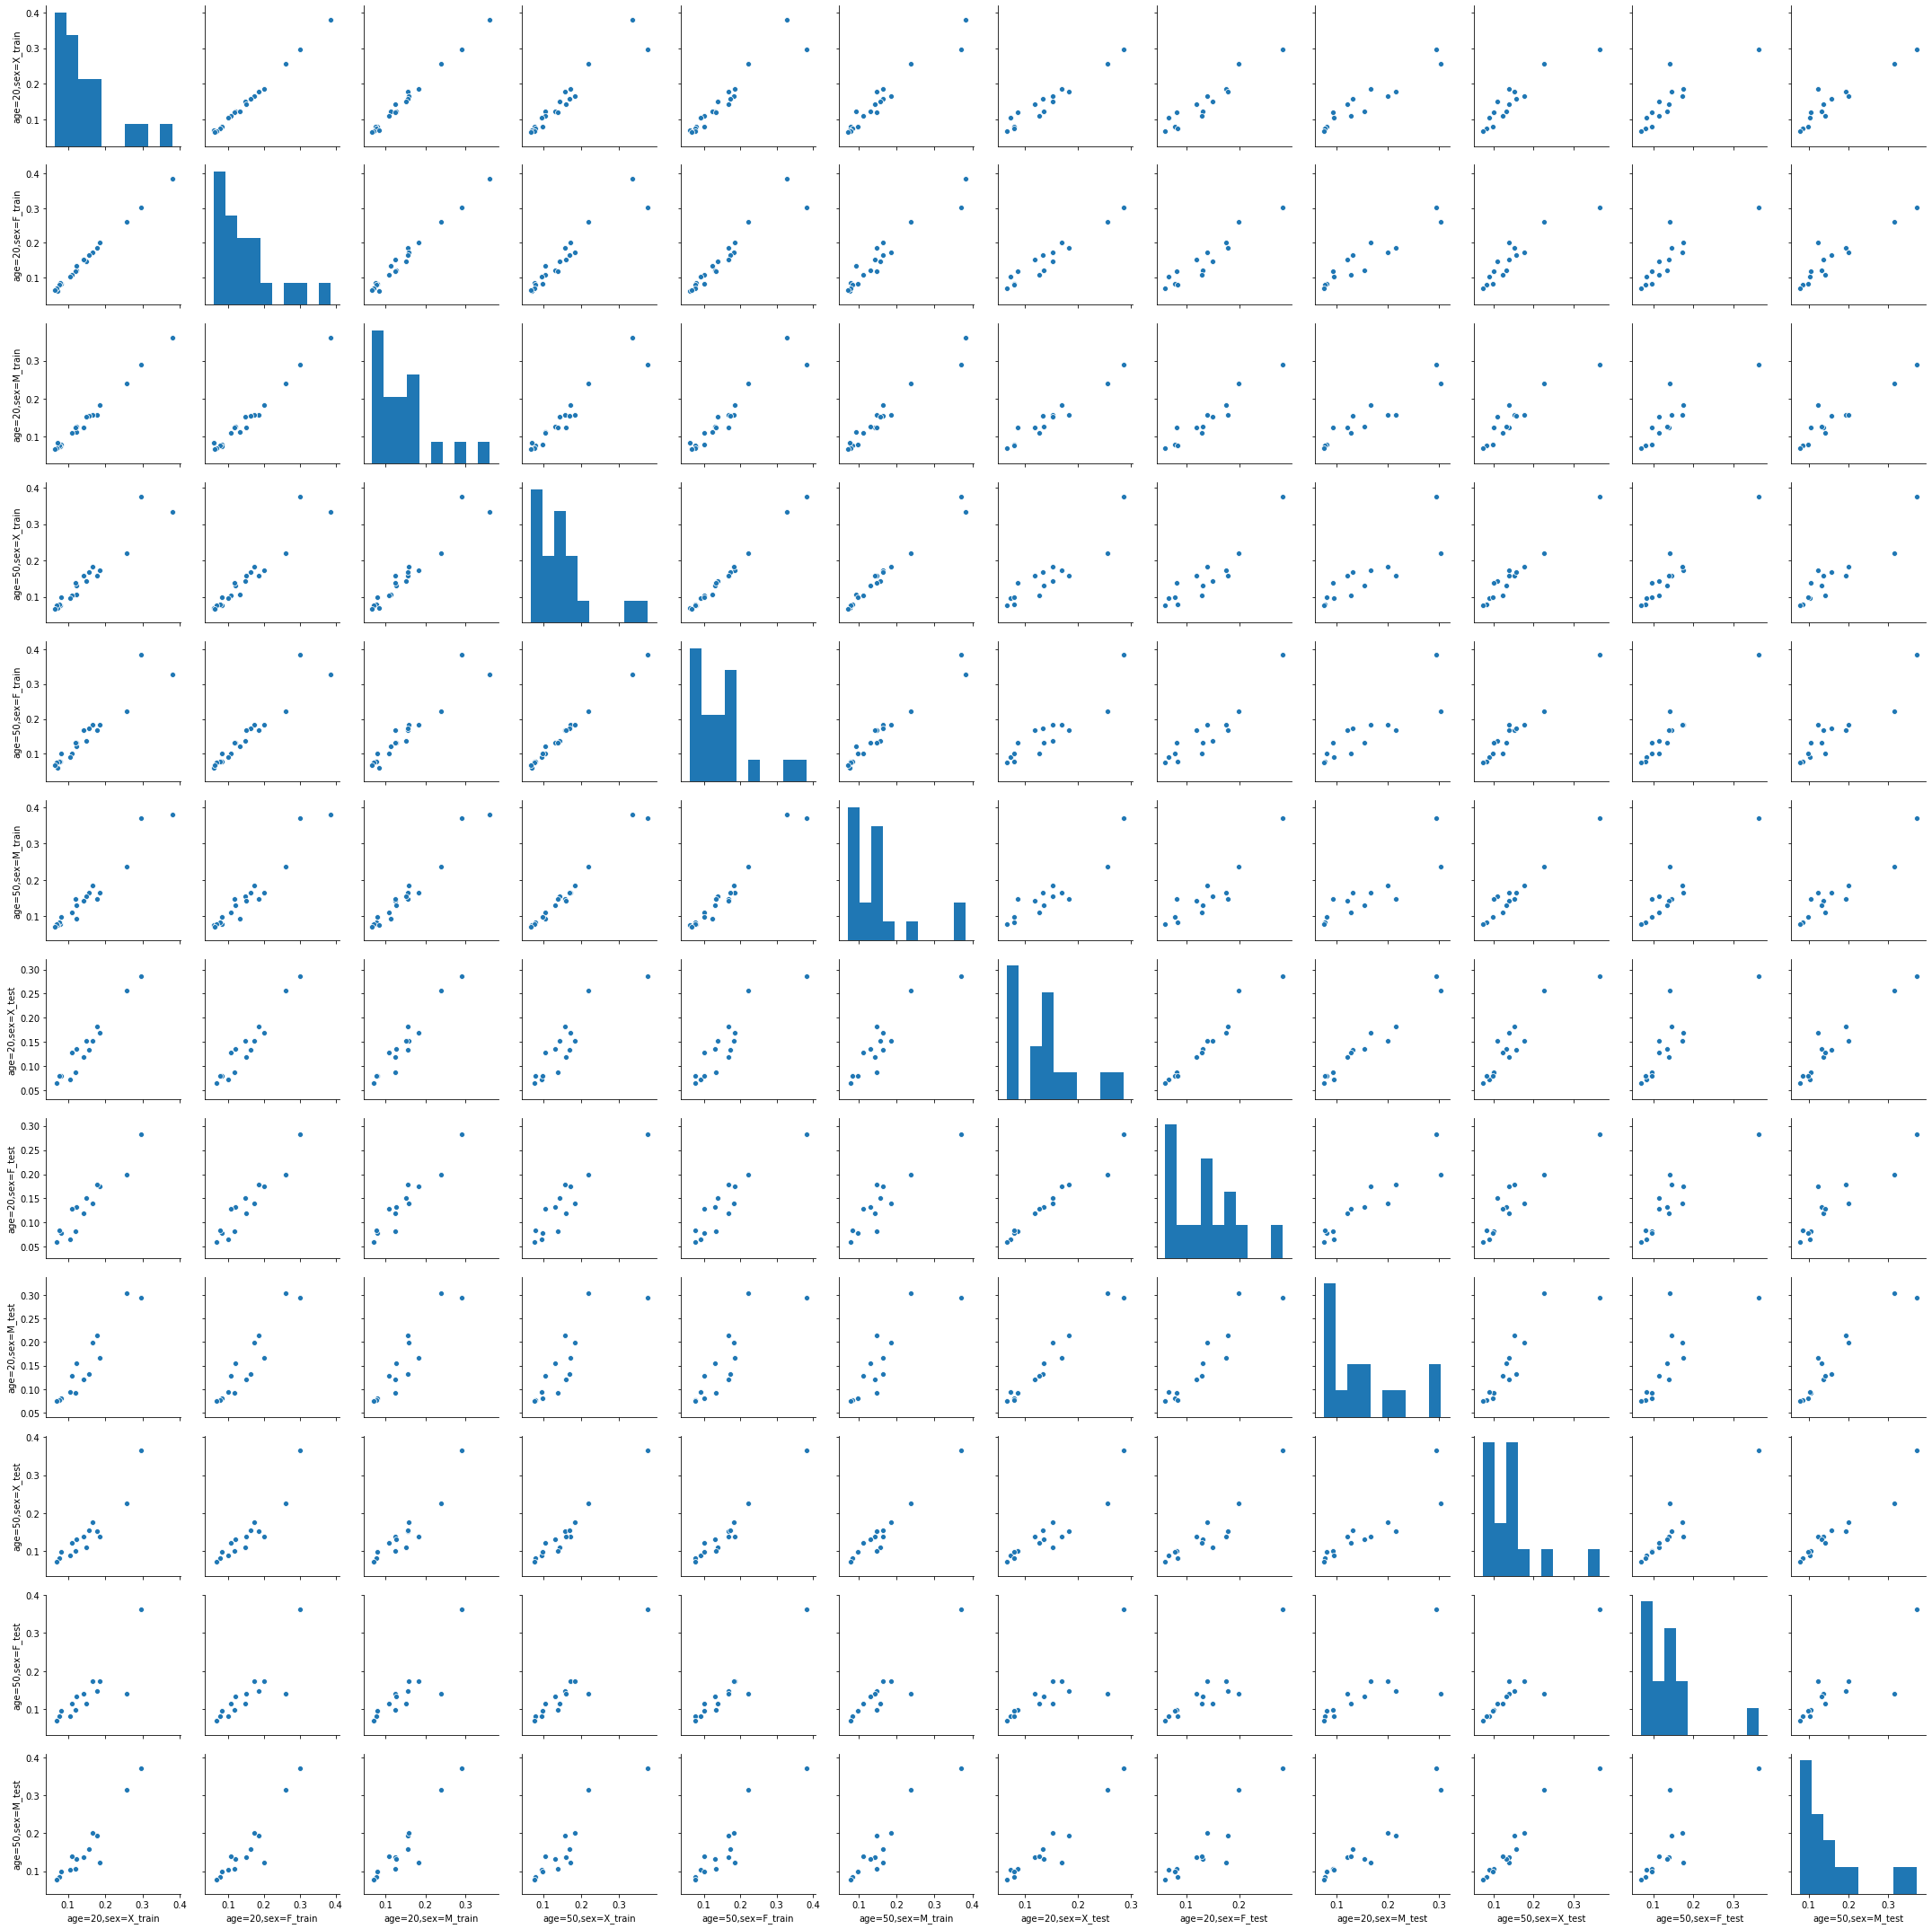

In [18]:
sns.pairplot(df.sort_values(by="age=20,sex=X_train", ascending=False).head(20))
# plt.savefig('pairplot.svg')

In [19]:
df.sort_values(by="age=20,sex=X_train", ascending=False).head(20)

,"age=20,sex=X_train","age=20,sex=F_train","age=20,sex=M_train","age=50,sex=X_train","age=50,sex=F_train","age=50,sex=M_train","age=20,sex=X_test","age=20,sex=F_test","age=20,sex=M_test","age=50,sex=X_test","age=50,sex=F_test","age=50,sex=M_test"
snp_1_152395302,0.379624,0.386047,0.359456,0.333663,0.328435,0.381148,NaN,NaN,NaN,NaN,NaN,NaN
snp_6_44264681,0.297152,0.300797,0.290500,0.375545,0.382842,0.370188,0.286979,0.281794,0.294326,0.365529,0.362722,0.372507
snp_4_95889514,0.257032,0.260457,0.239135,0.219156,0.222577,0.237174,0.255662,0.198776,0.303733,0.226216,0.140985,0.315248
snp_4_97934669,0.186355,0.200369,0.182435,0.172410,0.184601,0.163503,0.169675,0.175433,0.165911,0.138928,0.174047,0.123740
snp_15_44861299,0.177152,0.185710,0.156598,0.158326,0.167107,0.147389,0.182684,0.178769,0.214626,0.152804,0.147018,0.193361
snp_20_32074430,0.166233,0.172092,0.157800,0.183713,0.182457,0.184097,0.153134,0.140082,0.199006,0.176774,0.172884,0.201004
snp_3_123912059,0.157287,0.163878,0.155512,0.168814,0.172600,0.163916,0.133094,NaN,0.131989,0.155449,NaN,0.158263
snp_8_96479250,0.150115,0.147176,0.152138,0.143354,0.136564,0.155512,0.152479,0.150086,NaN,0.110258,0.115436,NaN
snp_10_51948737,0.142604,0.150693,0.124970,0.159295,0.167643,0.142297,0.118839,0.118489,0.120112,0.137613,0.139629,0.136753
snp_18_77365992,0.123676,0.120919,0.126227,0.130984,0.131041,0.129212,0.134825,0.131689,0.154279,0.132467,0.134649,0.131458


In [20]:
df_sel = df.reindex(df["age=20,sex=X_train"].abs().sort_values(ascending=False).index).head(100)

In [21]:
df_sel

,"age=20,sex=X_train","age=20,sex=F_train","age=20,sex=M_train","age=50,sex=X_train","age=50,sex=F_train","age=50,sex=M_train","age=20,sex=X_test","age=20,sex=F_test","age=20,sex=M_test","age=50,sex=X_test","age=50,sex=F_test","age=50,sex=M_test"
snp_1_152395302,0.379624,0.386047,0.359456,0.333663,0.328435,0.381148,NaN,NaN,NaN,NaN,NaN,NaN
snp_6_44264681,0.297152,0.300797,0.290500,0.375545,0.382842,0.370188,0.286979,0.281794,0.294326,0.365529,0.362722,0.372507
snp_4_95889514,0.257032,0.260457,0.239135,0.219156,0.222577,0.237174,0.255662,0.198776,0.303733,0.226216,0.140985,0.315248
snp_4_97934669,0.186355,0.200369,0.182435,0.172410,0.184601,0.163503,0.169675,0.175433,0.165911,0.138928,0.174047,0.123740
snp_15_44861299,0.177152,0.185710,0.156598,0.158326,0.167107,0.147389,0.182684,0.178769,0.214626,0.152804,0.147018,0.193361
...,...,...,...,...,...,...,...,...,...,...,...,...
snp_10_66790532,0.020127,0.018783,0.023525,0.019383,0.017693,0.023080,0.024223,NaN,0.024449,0.026231,NaN,0.024909
snp_2_76751510,0.019797,0.020271,0.018530,0.021865,0.022289,0.020925,0.016931,0.013786,0.019519,0.019660,0.018465,0.020723
snp_3_75716961,0.019733,0.019805,0.019568,0.023373,0.023423,0.023292,0.019132,0.018928,0.019388,0.022386,0.022388,0.022343
snp_2_135589129,0.019628,0.019252,0.020173,0.023724,0.023226,0.024364,0.019835,0.018497,0.022073,0.023540,0.022354,0.025759


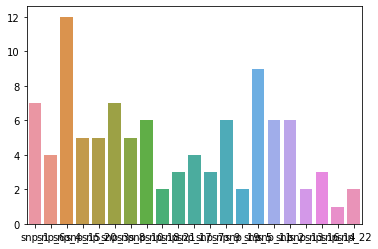

In [22]:
tmp = dict(Counter([s[:s.index('_',4)] for s in list(df_sel.index)]))
sns.barplot(x=list(tmp.keys()), y=list(tmp.values()))

In [23]:
df_not_sel = df.reindex(df["age=20,sex=X_train"].abs().sort_values(ascending=False).index).tail(500)

In [24]:
Counter([s[:s.index('_',4)] for s in list(df_not_sel.index)])

Counter({'snp_19': 17,
         'snp_20': 29,
         'snp_1': 34,
         'snp_4': 28,
         'snp_16': 21,
         'snp_6': 23,
         'snp_3': 34,
         'snp_17': 19,
         'snp_2': 38,
         'snp_9': 37,
         'snp_18': 22,
         'snp_10': 48,
         'snp_7': 29,
         'snp_22': 8,
         'snp_13': 8,
         'snp_21': 17,
         'snp_11': 15,
         'snp_8': 13,
         'snp_15': 17,
         'snp_5': 27,
         'snp_14': 7,
         'snp_12': 9})

In [25]:
list(tmp.values())

[7, 4, 12, 5, 5, 7, 5, 6, 2, 3, 4, 3, 6, 2, 9, 6, 6, 2, 3, 1, 2]

([], <a list of 0 Text yticklabel objects>)

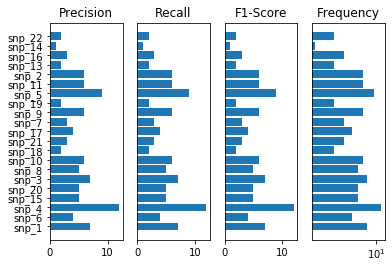

In [26]:
plt.subplot(141)
plt.title("Precision")
plt.barh(y=list(tmp.keys()),width=list(tmp.values()))
# plt.xlim(0,1)
plt.subplot(142)
plt.title("Recall")
plt.barh(y=list(tmp.keys()),width=list(tmp.values()))
# plt.xlim(0,1)
plt.yticks([])
plt.subplot(143)
plt.title("F1-Score")
plt.barh(y=list(tmp.keys()),width=list(tmp.values()))
# plt.xlim(0,1)
plt.yticks([])
plt.subplot(144)
plt.title("Frequency")
plt.barh(y=list(tmp.keys()),width=list(tmp.values()))
plt.xscale('log')
plt.yticks([])